<a href="https://colab.research.google.com/github/caxaxa/SigmaGeek_Cellular_Automata/blob/main/Sigma_Geek_Cellular_Atutomata_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Celular Automata Maze

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
#get the second grid from the game
import urllib.request


url = "https://s3.amazonaws.com/appforest_uf/f1678907491882x777874554533324300/input.txt"
response = urllib.request.urlopen(url)
grid0 = np.loadtxt(response, delimiter=" ")

In [3]:
# Define a function to plot a grid


def plot_grid(grid):
    n_rows, n_cols = grid.shape
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.imshow(grid, cmap="Greens", extent=[0, n_cols, 0, n_rows], origin="lower") # set cmap to "Greens"
    ax.set_xticks(range(n_cols+1))
    ax.set_yticks(range(n_rows+1))
    ax.grid(color="gray", linewidth=0.5)
    plt.show()

    return fig,ax

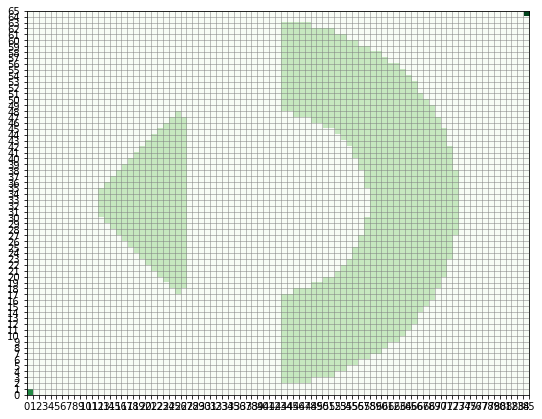

(<Figure size 648x648 with 1 Axes>, <Axes: >)

In [4]:
plot_grid(grid0)

In [10]:
def apply_rule(center, neighbors):
    # Count the number of green neighbors
    green_neighbors = np.count_nonzero(neighbors)
    # Apply the appropriate rule based on the center cell's color and the number of green neighbors
    if center == 0:
        # White cell rule
        if green_neighbors > 1 and green_neighbors < 5:
            return 1  # Turn white cell green
        else:
            return 0  # Keep white cell white
    else:
        # Green cell rule
        if green_neighbors > 3 and green_neighbors < 6:
            return 1  # Keep green cell green
        else:
            return 0  # Turn green cell white
    

def next_generation(grid):
    # Define function to apply the rules to each cell
    # Get the dimensions of the input grid
    n_rows, n_cols = grid.shape
    # Create a new grid of the same dimensions to store the next generation
    new_grid = np.zeros_like(grid)
    # Loop through each cell in the input grid
    for i in range(n_rows):
        for j in range(n_cols):
            # Get the 8 neighbors of the current cell
            neighbors = np.zeros(9, dtype=np.int8)
            for k in range(3):
                for l in range(3):
                    if k == 1 and l == 1:
                        continue  # Skip the center cell
                    row = i + k - 1
                    col = j + l - 1
                    if row < 0 or row >= n_rows or col < 0 or col >= n_cols:
                        # If a neighbor is out of bounds, treat it as a white cell
                        neighbors[k * 3 + l] = 0
                    else:
                        neighbors[k * 3 + l] = grid[row, col]
            # Apply the rules to the current cell and store the result in the new grid
            new_grid[i, j] = apply_rule(grid[i, j], neighbors)
    # Return the new grid representing the next generation
    return new_grid

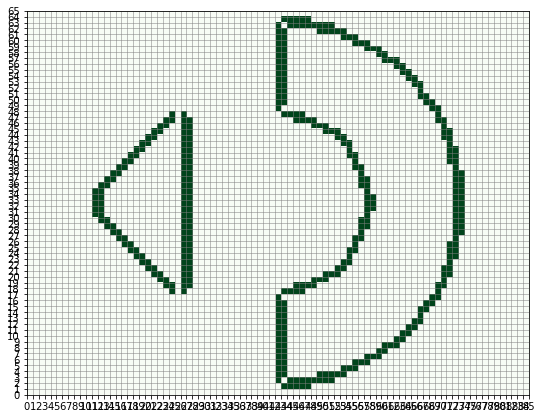

(<Figure size 648x648 with 1 Axes>, <Axes: >)

In [6]:
grid1 = next_generation(grid0)
plot_grid(grid1)

In [7]:
from matplotlib import cm

def plot_grid(grid, ax):
    # Create a color map: 0 as white and 1 as green
    cmap = cm.get_cmap('viridis', 2)
    cmap.set_under('white')
    img = ax.imshow(grid, cmap=cmap, vmin=0.5, vmax=1.5, interpolation='nearest')
    return [img]

def create_animation(grid0, n, update, plot_grid):
    frames = [grid0]

    for i in range(n-1):
        new_frame = update(frames[-1])
        frames.append(new_frame)

    def update_plot(frame_number, frames, ax):
        ax.clear()
        artists = plot_grid(frames[frame_number], ax)
        return artists

    fig, ax = plt.subplots()
    ani = animation.FuncAnimation(fig, update_plot, n, fargs=(frames, ax), interval=200, blit=True)

    plt.show()

    return ani

<ipython-input-7-03382b1b8af5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 2)


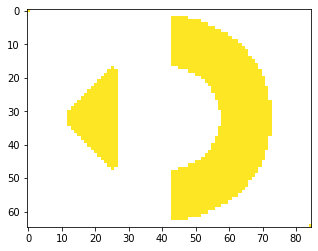

In [8]:
my_animation = create_animation(grid0, 200, next_generation, plot_grid)

In [ ]:
my_animation.save('anime.avi')

<ipython-input-10-03382b1b8af5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 2)


In [ ]:
my_animation.save('anime2.mp4')

<ipython-input-10-03382b1b8af5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 2)


In [24]:

import numpy as np
from collections import deque

def bfs_with_cellular_automata(maze, start, target, next_generation):
    def neighbors(row, col, rows, cols):
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            if 0 <= r < rows and 0 <= c < cols:
                yield r, c

    def reconstruct_path(came_from, current):
        path = []
        while current in came_from:
            path.append(current)
            current = came_from[current]
        return path[::-1]

    queue = deque([start])
    visited = set([start])
    came_from = dict()

    while queue:
        current = queue.popleft()

        if current == target:
            return reconstruct_path(came_from, current)

        maze = next_generation(maze)

        for r, c in neighbors(*current, *maze.shape):
            if maze[r, c] != 1 and (r, c) not in visited:
                queue.append((r, c))
                visited.add((r, c))
                came_from[(r, c)] = current

    return None



start = (0, 0)
target = grid0.shape

# Make sure to define your next_generation function

In [28]:

path = bfs_with_cellular_automata(maze, start, target, next_generation)
print("Path:", path)

Path: None


In [26]:
maze = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 1, 1, 0, 0]
])

start = (0, 0)
target = (4, 4)

In [ ]:

import numpy as np

def dfs_with_cellular_automata(maze, start, target, next_generation):
    def neighbors(row, col, rows, cols):
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            if 0 <= r < rows and 0 <= c < cols:
                yield r, c

    def dfs(maze, current, target, visited, path):
        if current == target:
            return path

        visited.add(current)
        maze = next_generation(maze)

        for r, c in neighbors(*current, *maze.shape):
            if maze[r, c] != 1 and (r, c) not in visited:
                result = dfs(maze, (r, c), target, visited, path + [(r, c)])
                if result is not None:
                    return result

        visited.remove(current)  # backtrack
        return None

    visited = set([start])
    path = dfs(maze, start, target, visited, [start])

    return path

# Example maze
maze = grid0

start = (0, 0)
target = tuple(grid0.shape)

# Make sure to define your next_generation func

path = dfs_with_cellular_automata(maze, start, target, next_generation)
print("Path:", path)

In [ ]:

import numpy as np
import pickle

def dfs_with_cellular_automata(maze, start, target, next_generation, checkpoint_path=None):
    def neighbors(row, col, rows, cols):
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            if 0 <= r < rows and 0 <= c < cols:
                yield r, c

    def dfs(maze, current, target, visited, path, checkpoint_path):
        if current == target:
            return path

        visited.add(current)
        maze = next_generation(maze)

        if checkpoint_path is not None:
            save_checkpoint(maze, visited, path, checkpoint_path)

        for r, c in neighbors(*current, *maze.shape):
            if maze[r, c] != 1 and (r, c) not in visited:
                result = dfs(maze, (r, c), target, visited, path + [(r, c)], checkpoint_path)
                if result is not None:
                    return result

        visited.remove(current)  # backtrack
        return None

    def save_checkpoint(maze, visited, path, checkpoint_path):
        checkpoint_data = {'maze': maze, 'visited': visited, 'path': path}
        with open(checkpoint_path, 'wb') as f:
            pickle.dump(checkpoint_data, f)

    def load_checkpoint(checkpoint_path):
        with open(checkpoint_path, 'rb') as f:
            checkpoint_data = pickle.load(f)
        return checkpoint_data['maze'], checkpoint_data['visited'], checkpoint_data['path']

    if checkpoint_path is not None and os.path.exists(checkpoint_path):
        maze, visited, path = load_checkpoint(checkpoint_path)
        current = path[-1]
    else:
        visited = set([start])
        path = [start]
        current = start

    path = dfs(maze, current, target, visited, path, checkpoint_path)

    return path

# Make sure to define your next_generation function


#checkpoint_path = 'checkpoint.pkl'

path = dfs_with_cellular_automata(maze, start, target, next_generation, checkpoint_path)
print("Path:", path)

In [ ]:
import numpy as np
import pickle
import time
import os

def dfs_with_cellular_automata(maze, start, target, next_generation, checkpoint_path=None, max_duration=1800):
    def neighbors(row, col, rows, cols):
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            if 0 <= r < rows and 0 <= c < cols:
                yield r, c

    def dfs(maze, current, target, visited, path, checkpoint_path, start_time, max_duration):
        if current == target:
            return path

        if time.time() - start_time > max_duration:
            return None

        visited.add(current)
        maze = next_generation(maze)

        if checkpoint_path is not None:
            save_checkpoint(maze, visited, path, checkpoint_path)

        for r, c in neighbors(*current, *maze.shape):
            if maze[r, c] != 1 and (r, c) not in visited:
                result = dfs(maze, (r, c), target, visited, path + [(r, c)], checkpoint_path, start_time, max_duration)
                if result is not None:
                    return result

        visited.remove(current)  # backtrack
        return None

    def save_checkpoint(maze, visited, path, checkpoint_path):
        checkpoint_data = {'maze': maze, 'visited': visited, 'path': path}
        with open(checkpoint_path, 'wb') as f:
            pickle.dump(checkpoint_data, f)

    def load_checkpoint(checkpoint_path):
        with open(checkpoint_path, 'rb') as f:
            checkpoint_data = pickle.load(f)
        return checkpoint_data['maze'], checkpoint_data['visited'], checkpoint_data['path']

    if checkpoint_path is not None and os.path.exists(checkpoint_path):
        maze, visited, path = load_checkpoint(checkpoint_path)
        current = path[-1]
    else:
        visited = set([start])
        path = [start]
        current = start

    start_time = time.time()
    path = dfs(maze, current, target, visited, path, checkpoint_path, start_time, max_duration)

    return path


#checkpoint_path = 'checkpoint.pkl'
max_duration = 1800  # 30 minutes

path = dfs_with_cellular_automata(maze, start, target, next_generation, checkpoint_path, max_duration)
print("Path:", path)

In [ ]:
def solve_maze(grid0, update):
    # Get the dimensions of the grid
    n, m = grid0.shape

    # Initialize the grid with the given initial configuration
    grid = grid0.copy()

    # Set the starting position to (0, 0)
    x, y = 0, 0

    # Set the goal position to (n-1, m-1)
    goal_x, goal_y = n-1, m-1

    # Create an empty path for the player
    path = []

    # Create a figure to display the maze
    fig, ax = plt.subplots()

    # Define a function to update the plot
    def plot_grid(grid, ax):
        # Create a color map: 0 as white , 1 as green, and 2 as green
        cmap = plt.cm.get_cmap('Greens', 3)
        cmap.set_under('white')
        img = ax.imshow(grid, cmap=cmap, vmin=0.5, vmax=2.5, interpolation='nearest')
        # Highlight the current player position in red
        ax.scatter(y, x, color='red', s=50)
        return [img]

    # Create the animation
    ani = create_animation(grid, n*m, update, plot_grid)

    # Define a function to update the player position and return the path
    def update_player(event):
        nonlocal x, y

        # Get the current player position
        current = grid[x, y]

        # Move the player based on the arrow keys
        if event.key == 'right' and y < m-1 and grid[x, y+1] != 1:
            y += 1
            direction = 'right'
        elif event.key == 'left' and y > 0 and grid[x, y-1] != 1:
            y -= 1
            direction = 'left'
        elif event.key == 'up' and x > 0 and grid[x-1, y] != 1:
            x -= 1
            direction = 'up'
        elif event.key == 'down' and x < n-1 and grid[x+1, y] != 1:
            x += 1
            direction = 'down'
        else:
            direction = ''

        # If the player lands on a 1, game over
        if grid[x, y] == 1:
            print("Game over!")
            plt.close(fig)
            return

        # If the player reaches the goal, game won
        if x == goal_x and y == goal_y:
            print("You win!")
            plt.close(fig)
            return

        # Update the player position in the grid
        grid[current] = 0
        grid[x, y] = 2

        # Update the plot
        ax.clear()
        plot_grid(grid, ax)

        # Redraw the plot
        fig.canvas.draw()

        # Append the current direction to the path
        path.append(direction)

        # Print the current player position and path
        print("Current position: ", x, y)
        print("Path: ", path)

    # Attach the key press event handler to the plot
    fig.canvas.mpl_connect('key_press_event', update_player)

    # Show the plot and start the animation
    plt.show()

    # Return the path as a list of strings
    return path , ani

<ipython-input-16-c474f04fd7e8>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens', 3)


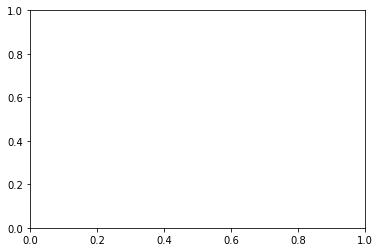

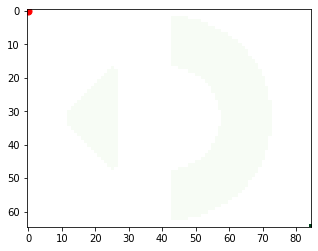

In [ ]:
path , ani = solve_maze(grid0, next_generation)

In [ ]:
path

[]

In [ ]:
ani.save('Trial_2.mp4')

<ipython-input-16-c474f04fd7e8>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens', 3)


In [ ]:
Print("g")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install qrcode

import qrcode

# Define the URL to encode in the QR code
url = "whatever"

# Create a QR code instance
qr = qrcode.QRCode(version=1, box_size=10, border=4)

# Add the URL to the QR code
qr.add_data(url)

# Compile the QR code
qr.make(fit=True)

# Generate an image of the QR code
img = qr.make_image(fill_color="black", back_color="white")

# Save the image as a PNG file
img.save("qrcode.pdf")



